## Problem 1 - Bayes' Theorem - Testing for a Genetic Defect
---
Testing for a genetic defect is not perfect. There are two kinds of errors in a binary test, a **false positive** where a test result incorrectly indicates a presence of a condition when it is not present, and a **false negative** where the test incorrectly fails to indicate the presence of a condition when it is present. These are in contrast with the two correct results; **true positive** and **true negative**.

Given the following data, answer the following questions
* Two percent of people have this genetic defect.
* Ninety two percent of tests for the gene detect it (true positive)
* Six percent of tests are false positives. 

### Part 1
What is the probability of getting a positive result on the test?

###  TODO: Show your work for Part 1 here: 



In [194]:
def p1_part1():
    """
    Return the probability (between 0 and 1) of getting a positive result on the test.
    """
    Acc_Pos_rate = 0.02  # Prevalence: probability of truly having the defect
    Acc_Neg_rate = 1 - Acc_Pos_rate  # Complement: probability of not having the defect
    TP_rate = 0.92  # True positive rate
    FP_rate = 0.06  # False positive rate
    
    # Total probability of testing positive
    P_pos = (TP_rate * Acc_Pos_rate) + (FP_rate * Acc_Neg_rate)
    
    return P_pos


### Part 2
What is the probability of having the gene, given a positive result?

### TODO: Show your work for Part 2 here:


In [195]:
def p1_part2():
    """
    Return the probability (between 0 and 1) of having the gene, given a positive result?
    
    """
    TP_rate = 0.92 # probability of test predicting inxdividual haveing defect | they actually have it
    prevalence = 0.02
    denom = p1_part1()

    ans = ( TP_rate * prevalence ) / denom # TP is probability we catch someone with it if they actually have it 
    
    return ans

## Problem 2 - Bayesian Networks
---
You are given the following Bayyesian network consisting of five binary random variables S1, S2, S3, S4, S5. Each variable can represent a certain state which can be "True" or "False". Answer the following questions based on the probabilities given below.

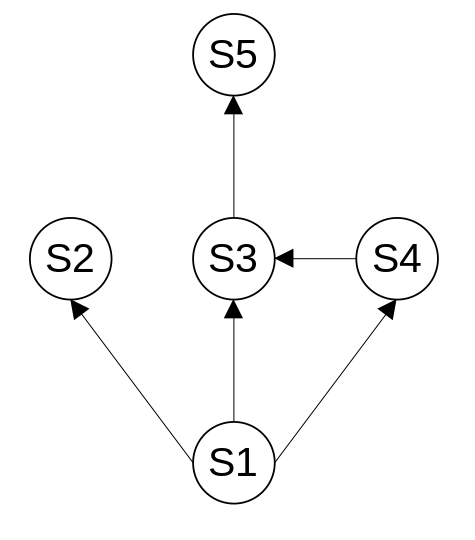

* P(S1 = true) = 0.5
* P(S2 = true | S1) = {0.6, S1 = false; 0.75, S1 = true}
* P(S4 = true | S1) = {0.1, S1 = false; 0.8, S1 = true}
* P(S3 = true | S1,S4) = {0.2, S1=false,S4=false; 0.8, S1=true,S4=false; 0.4, S1=false,S4=true; 0.9, S1=true,S4=true}
* P(S5 = true | S3) = { 0.75, S3 = false; 0.1 S3 = true}


### Part 1 
Given the above network and probabilities, calculate the probability of P(S1=true, S2=true, S3=true, S4=true, S5=true).



### TODO: Show your work here 
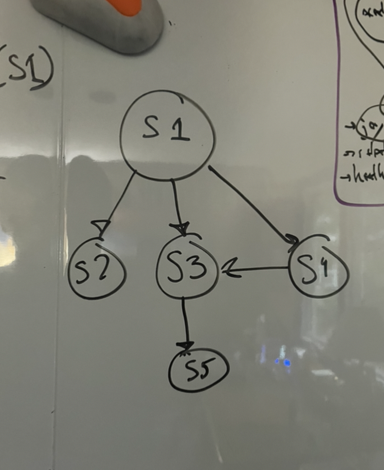
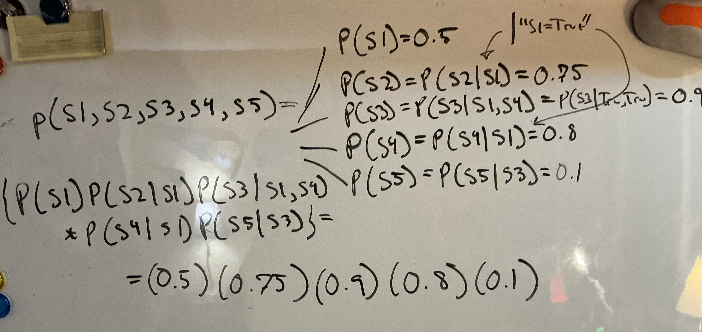


In [196]:
def p2_part1():
    """ 
    Return as a probability between 0 and 1
    """
    
    # Return the joint probability
    
    ans = 0.5 * 0.75 * 0.9 * 0.8 * 0.1
    print(ans)
    return ans
p2_part1()


0.027000000000000003


0.027000000000000003

### Part 2
Given the above network and probabilities, calculate the probability of P(S5 = true | S1 = true).


### TODO: Show your work for part 2 here
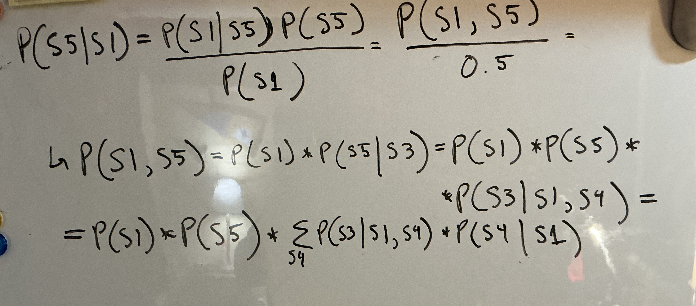


In [197]:
def p2_part2():

    # these have dependencies
    # ps1 = True (because it is given that it is True)

    # P(S4 | S1 = True)
    ps4 = 0.8 # S4 because given..
    p_NOT_s4 = 1 - ps4  # Complement of S4

    # we condition such that S1 is fixed as "true"... for both dependencies of S1
    # P(S3 | S1 = True, S4) ... but S4 might still be False
    p_s3_given_s1 = (0.8 * p_NOT_s4) + (0.9 * ps4)  # S3
    p_NOT_s3_given_s1 = 1 - p_s3_given_s1  # Complement of S3

    return (0.1 * p_s3_given_s1) + (0.75* p_NOT_s3_given_s1) # assuming only that S1 is tru

p2_part2()



p2_part2()




0.17799999999999994

### Part 3
Given the above network and probabilities, calculate the probability of P(S1 = true | S5 = true).

### TODO: show your work for part 3 here
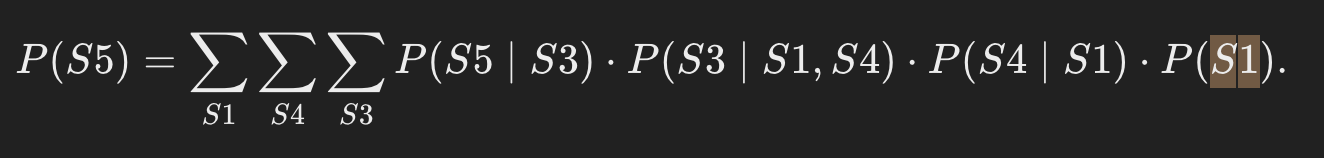
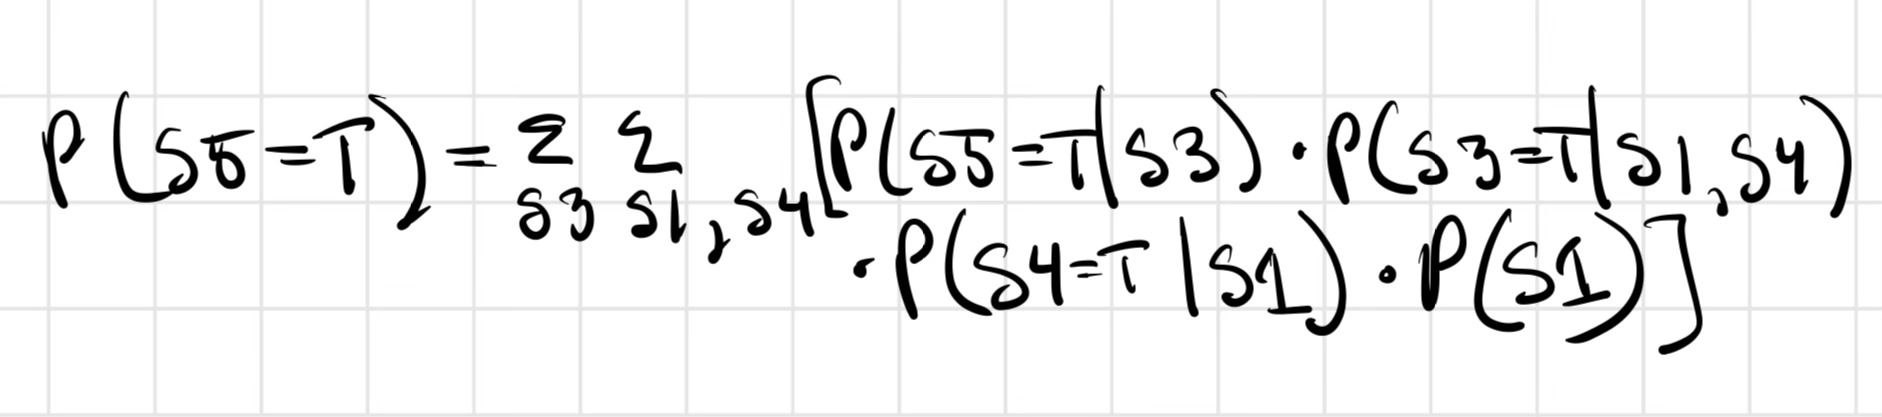
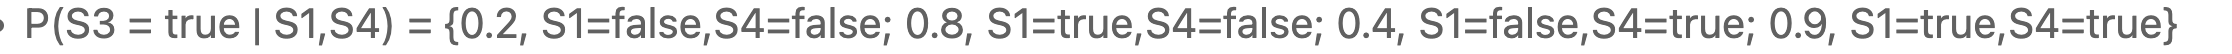
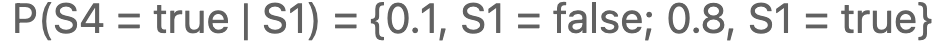

In [198]:
def p2_part3():
    ''' 
    Returns: P(S1=True | S5=True).
    '''

    # Prior probability of S1
    ps1 = 0.5  # P(S1=True)
    p_NOT_s1 = 1 - ps1  # P(S1=False)

    # P(S5=True | S1=True) from p2_part2
    # we will use this later and already calculated it, so we can use part2
    p_S5_true_given_S1_true = p2_part2()

    # P(S5=True | S1=False): Marginalize over S3
    # P(S4=True | S1=False) = 0.1
    p_S4_given_NOT_S1 = 0.1
    p_NOT_S4_given_NOT_S1 = 1 - p_S4_given_NOT_S1

    # P(S3=True | S1=False)... we sum over conditions of S4...
    # we have two conditions for S1|information about S1
    p_S3_given_NOT_S1 = (0.4 * p_S4_given_NOT_S1) + (0.2 * p_NOT_S4_given_NOT_S1)
    p_NOT_S3_given_NOT_S1 = 1 - p_S3_given_NOT_S1 
    
    # --> bayesian network encodes conditions of S4 that affect S5 in information about S3
    #       only have to sum over conditions of S3

    # P(S5=True | S1=False) = Sum over S3
    p_S5_true_given_S1_false = (0.1 * p_S3_given_NOT_S1) + (0.75 * p_NOT_S3_given_NOT_S1)

    # Marginalize P(S5=True) 
    # --> recall end of the formula above, multiplying out 
    p_S5_true = (p_S5_true_given_S1_true * ps1) + (p_S5_true_given_S1_false * p_NOT_s1)

    # Bayes' Rule: P(S1=True | S5=True)
    ans = (p_S5_true_given_S1_true * ps1) / p_S5_true

    return ans

p2_part3()


0.22675159235668785

### Part 4
Using the chain rule of probability factor P(S1, S2, S3, S4, S5) give the minimum number of parameters to specify the distribution according to the independencies mentioned:

(i) S1, S2, S3, S4, S5 are mutually independent.

(ii) no independencies. 

Note: assume that all variable are binary random variables. 

### TODO: show your work for part 4 here
# if they are all independent, we only need to multiply P(S1)*P(S2)*P(S3)*P(S4)*P(S5)
# if they are ALL dependent, each of the variables can depend on up to 5 others.


In [ ]:
def p2_part4():
    # YOUR ANSWER HERE
    # if all the states are mutually indpendent, each can only be T or F

    mutual_independent = 5 # if they are all independent, we only need to multiply P(S1)*P(S2)*P(S3)*P(S4)*P(S5)
    no_independencies = 32 # if they are ALL dependent, each of the variables can depend on up to 5 others.
                           # 2^5 = 32
    return mutual_independent, no_independencies

## Problem 3 - Introduction to the Rules System
Consider the following rules about hypothetical cats
```
rule1 = IF( AND( '(?x) is a hypothetical cat',
                 '(?x) is alive',
                 NOT('(?x) is alive')),
            THEN( '(?x) is a paradox' ) )

rule2 = IF( AND( '(?x) is a hypothetical cat',
                 '(?x) is alive',
                 '(?x) is dead'),
            THEN( '(?x) is Schrodinger's cat' ) )

rule3 = IF( AND( '(?x) is a hypothetical cat',
                 NOT('(?x) is alive'),
                 NOT('(?x) is dead')),
            THEN( '(?x) is amortal' ) )
```

In [200]:
from production import IF, AND, OR, NOT, THEN, DELETE, forward_chain
from data import *

### Part 1
Consider the following set of assertions about Kitty.
```
assertions = ( 'Kitty is a hypothetical cat',
               'Kitty is alive',
               'Kitty is dead' )
```
Which rules would match in the first round of forward chaining? Answer with a string of numbers in `p3_part1`. (For example, if the assertions match rule1 and rule2, answer '12'.) If no rules match, answer '0'.

In [201]:
def p3_part1():
    """
    Which rules would match in the first round of forward chaining?
    """
    # YOUR ANSWER HERE
    return '2'

## Part 2
Consider the following set of assertions about Nyan.
```
assertions = ( 'Nyan is a hypothetical cat',
               'Nyan is alive',
               'Nyan is not alive' )
```
Which rules would match in the first round of forward chaining? Answer with a string of numbers in `p3_part2`. If no rules match, answer '0'.



In [202]:
def p3_part2():
    """
    Which rules would match in the first round of forward chaining ?
    """
    # YOUR ANSWER HERE
    return '0'

### Part 3
Consider the following set of assertions about Garfield.
```
assertions = ( 'Garfield is a hypothetical cat',
               'Garfield likes lasagna' )
```
Which rules would match in the first round of forward chaining? Answer with a string of numbers in `p3_part3`. If no rules match, answer '0'.



In [203]:
def p3_part3():
    """
    Which rules would match in the first round of forward chaining ?
    """
    # YOUR ANSWER HERE
    return '3'

# Problem 4 - First Rule
We can use a production system to rank types of poker hands against each other. If we tell it basic things such as 'three-of-a-kind beats two-pair' and 'two-pair beats pair', it would make sense for it to be able to deduce by transitivity that 'three-of-a-kind beats pair'.

You're given this data about poker hands:
```
poker_data = [ 'two-pair beats pair',
               'three-of-a-kind beats two-pair',
               'straight beats three-of-a-kind',
               'flush beats straight',
               'full-house beats flush',
               'straight-flush beats full-house' ]
```
Write a one-rule system that finds all other combinations of which poker hands beat which, transitively, given some of the rankings already. For example, it should be able to deduce that a three-of-a-kind beats a pair, because a three-of-a-kind beats two-pair and a two-pair beats a pair. The rankings (data) are all provided in the form '(?x) beats (?y)'.

In [204]:
"""
Write a one-rule system that finds all other combinations of which poker hands beat which, 
transitively, given some of the rankings already. 
For example, it should be able to deduce that a three-of-a-kind beats a pair, because a three-of-a-kind beats 
two-pair and a two-pair beats a pair. The rankings (data) are all provided in the form '(?x) beats (?y)'.
"""

from production import IF, AND, OR, NOT, THEN, DELETE, forward_chain
from data import *

def transitive_rule():
    # YOUR ANSWER HERE
    rule = IF(  
        AND('(?x) beats (?y)', # simple rule using the api's syntax
            '(?y) beats (?z)', 
            NOT('(?x) beats (?z)') # we include this to prevent cycles from forming in our logic 
        ), 
        THEN('(?x) beats (?z)') )
    return rule

In [205]:
# You can test your rule by uncommenting these print statements:
print(forward_chain([transitive_rule()], abc_data))
print(forward_chain([transitive_rule()], poker_data))
print(forward_chain([transitive_rule()], minecraft_data))

('a beats b', 'b beats c', 'a beats c')
('two-pair beats pair', 'three-of-a-kind beats two-pair', 'straight beats three-of-a-kind', 'flush beats straight', 'full-house beats flush', 'straight-flush beats full-house', 'three-of-a-kind beats pair', 'straight beats two-pair', 'straight beats pair', 'flush beats three-of-a-kind', 'flush beats two-pair', 'flush beats pair', 'full-house beats straight', 'full-house beats three-of-a-kind', 'full-house beats two-pair', 'full-house beats pair', 'straight-flush beats flush', 'straight-flush beats straight', 'straight-flush beats three-of-a-kind', 'straight-flush beats two-pair', 'straight-flush beats pair')
('diamond-sword beats diamond-axe', 'stone-pick beats stone-shovel', 'diamond-axe beats iron-axe', 'iron-axe beats stone-shovel', 'iron-pick beats stone-pick', 'iron-axe beats iron-pick', 'stone-shovel beats fist', 'diamond-sword beats iron-axe', 'stone-pick beats fist', 'diamond-axe beats stone-shovel', 'diamond-sword beats stone-shovel', 'd

# Problem 5: Family Relations -> Rule Set
You will be given data that includes two kinds of statements:

- 'person (?x)': x is a person
- 'parent (?x) (?y)': x is a parent of y
Every person in the data set will be explicitly defined as a person.

Your task is to deduce, wherever you can, the following relations:

- 'sibling (?x) (?y)': x is the sibling of y (x and y are different people, but share at least one parent)
- 'child (?x) (?y)': x is the child of y
- 'cousin (?x) (?y)': x and y are cousins (a parent of x and a parent of y are siblings, but x and y are not siblings)
- 'grandparent (?x) (?y)': x is the grandparent of y
- 'grandchild (?x) (?y)': x is the grandchild of y

Note that for this problem, you are not limited to only defining rules that generate one of the five familial relations enumerated above. You are welcome to include rules that inform other relations. You're also welcome to implement additional familial relations such as great-grandparent or nibling, if you feel so inclined.

Keep in mind that some relations are symmetric, so you need to include them both ways. For example, if a is a cousin of b, then b is a cousin of a.

First, define all your rules individually -- that is, give them names by assigning them to variables. This will enable you to refer to the rules by name and easily rearrange them if you need to. Then, put them together into a list in order, and call it family_rules, so that the rules can be plugged into the forward-chaining system.

We've given you two larger sets of test data -- one for the Simpsons family, and one for the Black family from Harry Potter -- as well as a couple smaller data sets to help with debugging. To debug what happened in your rules, you can set verbose=True.

You will write your solution in lab1.py in the section labeled "Part 3". Note that lab1.py will automatically define a variable called black_family_cousins which will include all the 'cousin (?x) (?y)' relations you find in the Black family, per your rule set. There should be 14 of them.

IMPORTANT: Make sure you implement all five relations defined above. In this lab, the online tester will be stricter, and may test some relations not tested offline.

In [206]:
def family_rules():
    # Add your rules to this list:
    rules = [
        # Rule for self-relation
        IF('person (?x)', 
           THEN('self (?x) (?x)')),

        # Rule for sibling relation (symmetric)
        IF(AND('parent (?p) (?x)', 
               'parent (?p) (?y)', 
               NOT('self (?x) (?y)')), 
           THEN('sibling (?x) (?y)', 'sibling (?y) (?x)')),

        # Rule for cousin relation (symmetric)
        IF(AND('parent (?p1) (?x)', 
               'parent (?p2) (?y)', 
               'sibling (?p1) (?p2)', 
               NOT('self (?x) (?y)')), 
           THEN('cousin (?x) (?y)', 'cousin (?y) (?x)')),

        # Rule for child relation
        IF(AND('parent (?p) (?x)', 
               NOT('self (?x) (?p)')), 
           THEN('child (?x) (?p)')),

        # Rule for grandparent and grandchild relations
        IF(AND('parent (?p) (?y)', 
               'parent (?x) (?p)', 
               NOT('self (?x) (?y)')), 
           THEN('grandparent (?x) (?y)', 'grandchild (?y) (?x)')),
    ]
    return rules



# Uncomment this to test your data on the Simpsons family:
# print(forward_chain(family_rules(), simpsons_data, verbose=False))

# These smaller datasets might be helpful for debugging:
#print forward_chain(family_rules, sibling_test_data, verbose=True)
#print forward_chain(family_rules, grandparent_test_data, verbose=True)

# The following should generate 14 cousin relationships, representing 7 pairs
# of people who are cousins:
# black_family_cousins = [
#     relation for relation in
#     forward_chain(family_rules(), black_data, verbose=False)
#     if "cousin" in relation ]

# To see if you found them all, uncomment this line:
# print(black_family_cousins)

# Problem 6 - Backward Chaining

In this problem, we will do backward chaining by starting from a conclusion, and generating a goal tree of all of the statements we may need to test. The leaves of the goal tree will be sentences (strings) such as 'opus swims', indicating atomic failure or success based on whether or not 'opus swims' is in our assertions list.

We'll run this backward chainer on the zookeeper system of rules, a simple set of production rules for classifying animals, which you will find in data.py. As an example, here is the goal tree generated for the hypothesis 'opus is a penguin':
```
OR(
  'opus is a penguin',
  AND(
    OR('opus is a bird', 'opus has feathers', AND('opus flies', 'opus lays eggs'))
    'opus does not fly',
    'opus swims',
    'opus has black and white color' ))
```
You will write a procedure, `backchain_to_goal_tree(rules, hypothesis)`, which outputs the goal tree containing the statements you would need to test to prove the hypothesis. Note that this function is supposed to be a general backchainer, so you should not hard-code anything that is specific to a particular rule set. The backchainer will be tested on rule sets other than zookeeper_rules.

The rules you work with will be limited in scope, because general-purpose backward chainers are difficult to write. In particular, for this problem, make the following assumptions:

All variables that appear in a rule's antecedent also appear in its consequent (so there are no "unknown" variables in the antecedent). In other words, you will not need to do backtracking.
All assertions are positive: no rules will have DELETE clauses or NOT expressions.
Rule antecedents never have nested RuleExpression nodes. For example, an expression such as (OR (AND x y) (AND z w)) will never appear within an antecedent, because that contains an AND expression nested under an OR expression.
Rule consequents always have just a single statement.
Note that an antecedent can be a single hypothesis (a string) or a RuleExpression.

Taking advantage of your visual problem-solving apparatus
As a species, humans are very visual learners. If you're having trouble conceptualizing what should be going on in the backward chaining algorithm, we strongly recommend drawing a diagram and working your way down the goal tree by hand.



In [ ]:
# Import additional methods for backchaining
from production import AND, OR, NOT, PASS, FAIL, IF, THEN, match, populate, simplify, variables, instantiate
from data import zookeeper_rules

def backchain_to_goal_tree(rules, hypothesis):
    """
    Takes a hypothesis (string) and a list of rules (list
    of IF objects), returning an AND/OR tree representing the
    backchain of possible statements we may need to test
    to determine if this hypothesis is reachable or not.

    This method should return an AND/OR tree, that is, an
    AND or OR object, whose constituents are the subgoals that
    need to be tested. The leaves of this tree should be strings
    (possibly with unbound variables), *not* AND or OR objects.
    Make sure to use simplify(...) to flatten trees where appropriate.
    """

    '''
    John's docstring
    rules : A list of rules, where each rule has a consequent (string) 
            and an antecedent (either a string or a logical expression like AND or OR).
        
        # e.g. rule Z1
        IF( AND( '(?x) has hair' ),     <-- antecedent
            THEN( '(?x) is a mammal' )) <-- consequent


        I think we want to grab and store the rules where the consequent
        matches (or contributes?) to the hypothesis?

    hypothesis : the query we want to prove is true

    returns : Goal tree (a nested structure of OR and AND nodes and atomic strings).

    Recursive Backward Chaining: High Level:

    Start with the hypothesis.
    Find rules where the hypothesis matches the consequent.
    Replace the hypothesis with the rule's antecedent in the tree.
        # key because we know ante. had to be true to prove hyp.,
        # and ante. must've come from somwhere--trace and store
    Continue until the leaves of the tree are atomic statements (strings like 'opus swims').
        # I don't really get what the base case should be.
    '''

    # Base case: If no rules match the hypothesis, it's a leaf node
    # print(hypothesis)
    var_form_hyp = hypothesis.replace('opus ', '(?x) ')
    # print(var_form_hyp)  # Output: '(?x) is a penguin'


    matching_rules = [rul for rul in rules if rul.consequent() == var_form_hyp]
    if not matching_rules:  # No rules match the hypothesis
        
        return hypothesis  # This is a leaf node (just a string)
     
    goal_tree = [hypothesis]
    values_dict = {'x': 'opus'}  # Map variable x to the subject


    for rul in matching_rules: # only need to recurse through rules with matching consequents

        if rul.consequent() == var_form_hyp:  # Check if the rule's consequent matches the hypothesis
            # print('consq match with rule : ', rul, '\n')

            ante = rul.antecedent()  # Get the antecedent of the rule

            # Recursively backchain on the antecedent
            if isinstance(ante, AND):  # AND logic
                goal_tree.append(instantiate( AND([backchain_to_goal_tree(rules, sub_goal) for sub_goal in ante]), values_dict) )
            elif isinstance(ante, OR):  # OR logic
                goal_tree.append(instantiate( OR([backchain_to_goal_tree(rules, sub_goal) for sub_goal in ante]), values_dict) )
    
    final_goal_tree = simplify(OR(goal_tree))
    # print(final_goal_tree)

    return final_goal_tree

# Uncomment this to test out your backward chainer:
print(backchain_to_goal_tree(zookeeper_rules, 'opus is a penguin'))

OR('opus is a penguin', AND(OR('opus is a bird', 'opus has feathers', AND('opus flies', 'opus lays eggs')), 'opus does not fly', 'opus swims', 'opus has black and white color'))
